# Simple Pendulum
----------

$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{L}sin(\theta)$$

Using a central difference second order approximation for second derivative, discrete equation is obtained:
$$ \frac{\theta_{n+1} - 2\theta_n + \theta_{n-1}}{\Delta t^2} = -\frac{g}{L}sin(\theta) $$
  
$$ \theta_{n+1} = -\frac{\Delta t^2 g}{L}sin(\theta_n) + 2\theta_n - \theta_{n-1} $$
  
S.T.  
$$ \frac{d \theta}{dt}_{t=0} = 0  \\
\\
\theta_{t=0} = \theta_o$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
time_steps = 1000
t = np.linspace(0, 10, time_steps)
theta = t.copy()
dt = np.diff(t)[0]

theta_not = np.pi/3
L = 2
g = 9.81

theta[0] = theta_not
theta[1] = theta_not

for i in range(1, time_steps-1):
    theta[i+1] = -dt**2 * g / L * np.sin(theta[i]) + 2*theta[i] - theta[i-1]

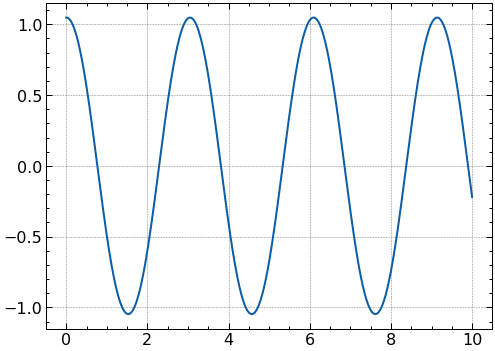

In [4]:
plt.plot(t, theta)

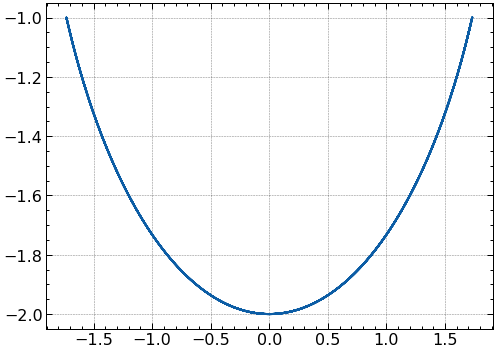

In [5]:
plt.plot(L*np.sin(theta), -L*np.cos(theta))

In [6]:
def f(t_f):
    time_steps = 20
    t = np.linspace(0, t_f, time_steps)
    theta = t.copy()
    dt = np.diff(t)[0]

    theta_not = np.pi/3
    L = 2
    g = 9.81

    theta[0] = theta_not
    theta[1] = theta_not

    for i in range(1, time_steps-1):
        theta[i+1] = -dt**2 * g / L * np.sin(theta[i]) + 2*theta[i] - theta[i-1]
        
    return [L*np.sin(theta[-1]), -L*np.cos(theta[-1])]

t = np.linspace(0, 10, 100)

In [8]:
%%capture
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
ln1, = plt.plot([], [], 'o')
time_text = ax.text(-0.25, -0.25, '', fontsize = 15,
                   bbox = dict(facecolor = 'white', edgecolor = 'black'))
ax.set_xlim(-2, 2)
ax.set_ylim(-2.5, 0)

def animate(i):
    ln1.set_data(f(i/50)[0], f(i/50)[1]) #i/x means x fps
    time_text.set_text('t = {:.2f}'.format(i/50))
    
ani = animation.FuncAnimation(fig, animate, frames = 250, interval = 50)

In [9]:
HTML(ani.to_jshtml())

![football](pendulo.gif "Simple Pendulum")

In [ ]:
# Execute this cell to save the animation
ani.save('pendulo.gif', writer = 'pillow', fps = 50, dpi = 100)